# Analyse décès sur le territoire Français

Une analyse des impacts globaux du covid en s'abstrayant des biais de tests

In [1]:
# Generic imports
import pandas as pd
import matplotlib.pyplot as plt

## data crunching

In [2]:
# Data from insee
# https://insee.fr/fr/statistiques/4487988?sommaire=4487854 
insee_file = "2020-05-15_deces_quotidiens_departement_csv.csv"
df_insee = pd.read_csv("./Data_FR_Deaths/" + insee_file, delimiter=";", index_col="Date_evenement")
df_insee

,Zone,Communes_a_envoi_dematerialise_Deces2020,Total_deces_2020,Communes_a_envoi_dematerialise_Deces2019,Total_deces_2019,Communes_a_envoi_dematerialise_Deces2018,Total_deces_2018
Date_evenement,,,,,,,
01/03/2020,France,1625.0,1777.0,1708,1872,1928,2136
02/03/2020,France,3263.0,3555.0,3467,3782,3933,4327
03/03/2020,France,4891.0,5316.0,5035,5530,5881,6455
04/03/2020,France,6571.0,7121.0,6747,7410,7768,8545
05/03/2020,France,8197.0,8891.0,8455,9278,9769,10746
...,...,...,...,...,...,...,...
27/05/2020,Dept_976,NaN,NaN,203,203,160,160
28/05/2020,Dept_976,NaN,NaN,207,207,164,164
29/05/2020,Dept_976,NaN,NaN,208,208,166,166


### Vérification de l'intégrité des sommes

In [3]:
check = df_insee[df_insee.loc[:,"Zone"]=="France"]

In [4]:
check_2 = df_insee[df_insee.loc[:,"Zone"]!="France"].groupby('Date_evenement').sum()

In [5]:
check_2

,Communes_a_envoi_dematerialise_Deces2020,Total_deces_2020,Communes_a_envoi_dematerialise_Deces2019,Total_deces_2019,Communes_a_envoi_dematerialise_Deces2018,Total_deces_2018
Date_evenement,,,,,,
01/03/2020,1625.0,1777.0,1708,1872,1928,2136
01/04/2020,60353.0,65452.0,50490,55320,56558,62189
01/05/2020,119401.0,129320.0,95439,104444,102238,112325
02/03/2020,3263.0,3555.0,3467,3782,3933,4327
02/04/2020,62778.0,68080.0,52047,57021,58113,63904
...,...,...,...,...,...,...
30/03/2020,55268.0,59933.0,47485,52013,53364,58641
30/04/2020,118071.0,127931.0,93923,102785,100885,110841
30/05/2020,0.0,0.0,137459,150329,143276,157215


In [6]:
check_3 = check.join(check_2, rsuffix="_sum",)[["Total_deces_2020","Total_deces_2019","Total_deces_2018", "Total_deces_2020_sum","Total_deces_2019_sum","Total_deces_2018_sum"]]

In [7]:
(check_3["Total_deces_2020"]-check_3["Total_deces_2020_sum"]).describe()

count    65.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
dtype: float64

In [8]:
(check_3["Total_deces_2019"]-check_3["Total_deces_2019_sum"]).describe()

count    92.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
dtype: float64

In [9]:
(check_3["Total_deces_2018"]-check_3["Total_deces_2018_sum"]).describe()

count    92.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
dtype: float64

### filtrage et reformation du df insee

In [10]:
df_insee = df_insee[df_insee["Zone"]=="France"][["Total_deces_2020"]]

In [11]:
df_insee.columns=[2020]
df_insee.sort_index(axis=1,inplace=True)

In [12]:
# our main dataframe to compile all data 2020 and before 
df_wp = df_insee.diff()
df_wp.index = pd.to_datetime(df_wp.index, dayfirst=True)

In [13]:
df_wp.loc["2020/03/01",:]=df_insee.loc["01/03/2020",:]

In [34]:
df_wp

,2020
2020-01-01,1905.0
2020-01-02,1901.0
2020-01-03,1954.0
2020-01-04,1837.0
2020-01-05,1751.0
...,...
2020-05-27,NaN
2020-05-28,NaN
2020-05-29,NaN
2020-05-30,NaN


## Données de références

In [15]:
# données historiques
df_histo_csv = pd.read_csv("./Data_FR_Deaths/" + 'histo_deces.csv', index_col = 0)
# remove badly formatted data and before 2000
df_histo_csv = df_histo_csv.filter(regex = '2[0-9]{3}\-[0-1][0-9]\-[0-3][0-9]', axis=0)
# transform index into dates
#df_histo_csv.index = pd.to_datetime(df_histo_csv.index, format = "%Y-%m-%d")
df_histo_csv.index = pd.DatetimeIndex(df_histo_csv.index)
# Add info for reference
df_histo_csv.reset_index(inplace=True)



In [32]:
df_histo_csv.sort_values(by="date_deces").tail()

,date_deces,nbr_deces
7390,2020-03-26,1647
7391,2020-03-27,1178
7392,2020-03-28,853
7393,2020-03-29,559
7394,2020-03-30,179


### Date for 2020 and references

In [17]:
import datetime
base = datetime.datetime.fromisoformat("2020-01-01")
date_list = [base + datetime.timedelta(days=x) for x in range(366)]

In [18]:
df_histo = pd.DataFrame(date_list)
df_histo.columns = ['date_ref']
df_histo['year'] = pd.DatetimeIndex(df_histo['date_ref']).year
df_histo['week'] = pd.DatetimeIndex(df_histo['date_ref']).weekofyear
df_histo['dow'] = pd.DatetimeIndex(df_histo['date_ref']).weekday  + 1
#df_histo['ref'] = df_histo['week'].astype('str') + "-" + df_histo['dow'].astype('str')
df_histo['ref'] = df_histo['date_ref'] 

In [19]:
lst_years = range(2019,1999,-1)

In [20]:
# Join the references same dow last year (-364d)
for x in lst_years:
    df_histo['ref'] = df_histo['ref'] - pd.Timedelta(days=364)
    df_histo = df_histo.join(df_histo_csv.set_index('date_deces'), on=['ref'],rsuffix='_'+str(x), how='left')


In [21]:
df_histo.drop(['year','week','dow','ref'], axis=1, inplace=True)
df_histo.set_index('date_ref',inplace=True)
df_histo.columns=lst_years

In [22]:
df_histo

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
date_ref,,,,,,,,,,,,,,,,,,,,
2020-01-01,1935,2137,2251,1799,1969,1686,1742,1686,1785,1796,1972,1713,1665,1665,1604,1702,1706,1830,1728,1886
2020-01-02,1880,2160,2271,1731,1920,1750,1868,1716,1691,1790,2003,1689,1539,1631,1625,1597,1677,1816,1585,1969
2020-01-03,1900,2102,2260,1721,1965,1699,1777,1692,1714,1728,2017,1688,1579,1602,1573,1561,1556,1856,1633,1979
2020-01-04,1921,2020,2239,1741,1936,1693,1793,1648,1725,1694,1942,1668,1600,1548,1668,1633,1632,1851,1625,1975
2020-01-05,1896,2008,2228,1745,1903,1562,1675,1642,1633,1577,2005,1706,1446,1599,1533,1541,1572,1788,1633,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,1715,1756,1973,2206,1726,1856,1618,1706,1713,1673,1732,1915,1682,1532,1594,1458,1448,1772,1872,1540
2020-12-28,1892,1890,2027,2371,1835,1978,1786,1787,1736,1759,1788,2047,1722,1658,1577,1652,1614,1851,1916,1764
2020-12-29,1800,1839,2142,2353,1778,1848,1781,1803,1776,1803,1820,2086,1803,1557,1734,1619,1675,1774,1852,1646


In [23]:
#dummy historical data
#import numpy as np

#df_histo = pd.DataFrame(np.random.randint(1500,2000,size=(365, 19)),columns=range(1998,2017))

In [24]:
df_histo['max'] = df_histo.max(axis=1)
df_histo['min'] = df_histo.min(axis=1)

In [25]:
df_histo

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,2007,2006,2005,2004,2003,2002,2001,2000,max,min
date_ref,,,,,,,,,,,,,,,,,,,,,
2020-01-01,1935,2137,2251,1799,1969,1686,1742,1686,1785,1796,...,1665,1665,1604,1702,1706,1830,1728,1886,2251,1604
2020-01-02,1880,2160,2271,1731,1920,1750,1868,1716,1691,1790,...,1539,1631,1625,1597,1677,1816,1585,1969,2271,1539
2020-01-03,1900,2102,2260,1721,1965,1699,1777,1692,1714,1728,...,1579,1602,1573,1561,1556,1856,1633,1979,2260,1556
2020-01-04,1921,2020,2239,1741,1936,1693,1793,1648,1725,1694,...,1600,1548,1668,1633,1632,1851,1625,1975,2239,1548
2020-01-05,1896,2008,2228,1745,1903,1562,1675,1642,1633,1577,...,1446,1599,1533,1541,1572,1788,1633,1995,2228,1446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,1715,1756,1973,2206,1726,1856,1618,1706,1713,1673,...,1682,1532,1594,1458,1448,1772,1872,1540,2206,1448
2020-12-28,1892,1890,2027,2371,1835,1978,1786,1787,1736,1759,...,1722,1658,1577,1652,1614,1851,1916,1764,2371,1577
2020-12-29,1800,1839,2142,2353,1778,1848,1781,1803,1776,1803,...,1803,1557,1734,1619,1675,1774,1852,1646,2353,1557


### Complement données début 2020 
Jan-Feb depuis historique

In [26]:
deb_2020 = pd.date_range("2020-01-01", "2020-02-29")

df_deb_2020 = df_histo_csv.set_index('date_deces').loc[deb_2020, :]
df_deb_2020.columns = [2020]
df_deb_2020.describe()

,2020
count,60.000000
mean,1811.566667
std,83.341317
min,1637.000000
25%,1754.000000
50%,1802.500000
75%,1866.500000
max,1996.000000


In [27]:
df_wp.describe
df_wp = df_wp.append(df_deb_2020)


In [28]:
df_wp= df_wp.sort_index()


## Comparaison décès par jour 2020 vs références

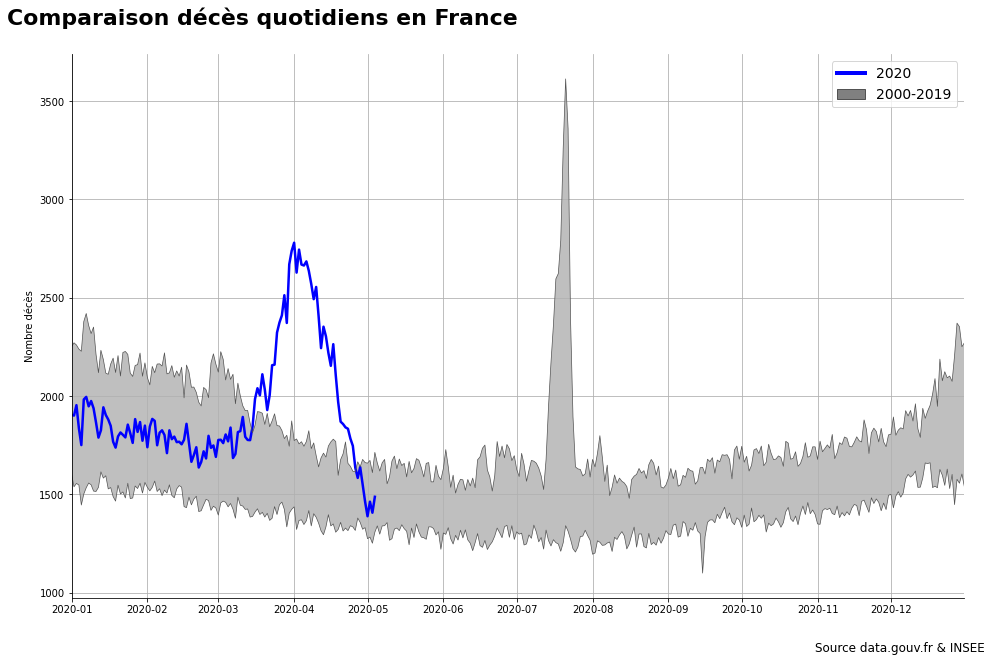

In [29]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Figure et axe principaux
# ########################
fig, ax = plt.subplots(figsize=(16,10))

# courbe 2020

ax.plot(df_wp, label='2020', linewidth=2.5, color='blue')


# defining area of reference
# ##########################

# Boundaries
ax.plot(df_histo[['min','max']], label='2000-2019', color="#525252",linewidth=0.7 )
# fill
ax.fill_between(date_list, df_histo['min'], df_histo['max'], facecolor='grey', alpha=0.5)


# layout
ax.set_title("Comparaison décès quotidiens en France", fontsize=22, pad=30, fontweight = 'bold',horizontalalignment='right')
#ax.set_xlabel("date du jour")
ax.set_ylabel("Nombre décès")
ax.grid(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.margins(0.05)
ax.set_xlim([pd.to_datetime('2020-01-01'),pd.to_datetime('2020-12-31')])

# define legend
# #############
legend_elements = [Line2D([0], [0], color='blue', lw=4, label='2020'),
                   Patch(facecolor='grey', edgecolor='#525252',
                         label='2000-2019')]
ax.legend(handles=legend_elements, fontsize=14)

fig.text(0.77, 0.05, "Source data.gouv.fr & INSEE", fontsize=12)


fig.savefig("deces_fr.png")
